Linear Regression from scratch implementation,
I implemented it during machine learning classes lectured by Dr Przemysław Sekuła.
Base notebook can be found under: https://github.com/PrzemekSekula/DeepLearningClasses1/blob/master/LinearRegression/Linear_Regression.ipynb

In [21]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

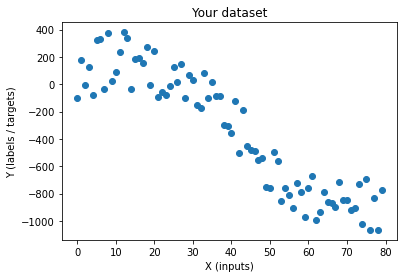

In [22]:
#Cell below is responsible for creating random data and makes sure values stay the same

def get_x_y(coefs, data_length, noise):

    x = np.arange(data_length)
    y = np.zeros(x.shape)

    for i, c in enumerate(coefs):
        y += c * (x**i)
    mul = np.max(y) - np.min(y)
    y = [yi + mul * (noise * (2 * np.random.rand() - 1)) for yi in y]

    return np.asarray(x), np.asarray(y)

np.random.seed(12)

coefs = [50, 25, -1.25, 0.01]
data_length = 80
noise = 0.2

x, y = get_x_y(coefs, data_length, noise)

f = plt.figure()
plt.scatter(x, y)
plt.title('Your dataset')
plt.xlabel('X (inputs)')
plt.ylabel('Y (labels / targets)')
plt.show()

Let's say our function is given with formula:
$h(x)  = \Theta_0 + \Theta_1 * x$


In [23]:
# Function below is responsible for calculating value of hypothesis
def compute_h(x, th0, th1):

    x = np.asarray(x) # It removes problems with older version of libraries
    h = th0 + th1 * x

    return h

In [24]:
# Function below is responsible for calculating performance metric - in our case cost of the function which is given by formula:

$J = \frac{1}{2m}\sum_{i=1}^{m}{(y_i - h(x_i))}^2$


In [25]:
def cost(y, predicted_y):
    c = np.mean((y - predicted_y)**2) / 2
    return c

In [26]:
#Function below is responsible for computing partial derivatives. We're using gradient descent algorithm to find minimum of cost function
def compute_derivatives(x, y,th0 , th1):

    difference_y_h = y - compute_h(x, th0, th1)
    dTh0 = -np.mean(difference_y_h)
    dTh1 = -np.mean(difference_y_h * x)

    return dTh0, dTh1

In [27]:
# Function below is responsible for updating our hypothesis parameters during execution of algorithm
def update_theta(th0, th1, del0, del1, learning_rate):
    th0 = th0 - learning_rate * del0
    th1 = th1 - learning_rate * del1

    return th0, th1

Iteration 0, Theta 0: -0.24, Theta 1: -15.90, Cost: 57306.81
Iteration 2500, Theta 0: 126.63, Theta 1: -13.24, Cost: 21217.15
Iteration 5000, Theta 0: 207.81, Theta 1: -14.77, Cost: 17387.74
Iteration 7500, Theta 0: 259.80, Theta 1: -15.75, Cost: 15817.16
Iteration 10000, Theta 0: 293.10, Theta 1: -16.38, Cost: 15173.02
Iteration 12500, Theta 0: 314.42, Theta 1: -16.78, Cost: 14908.83
Iteration 15000, Theta 0: 328.08, Theta 1: -17.04, Cost: 14800.48
Iteration 17500, Theta 0: 336.83, Theta 1: -17.21, Cost: 14756.04
Iteration 20000, Theta 0: 342.43, Theta 1: -17.31, Cost: 14737.82
Iteration 22500, Theta 0: 346.01, Theta 1: -17.38, Cost: 14730.34
Iteration 25000, Theta 0: 348.31, Theta 1: -17.42, Cost: 14727.28
Iteration 27500, Theta 0: 349.78, Theta 1: -17.45, Cost: 14726.02
Iteration 30000, Theta 0: 350.72, Theta 1: -17.47, Cost: 14725.50
Iteration 32500, Theta 0: 351.33, Theta 1: -17.48, Cost: 14725.29
Iteration 35000, Theta 0: 351.71, Theta 1: -17.49, Cost: 14725.20
Iteration 37500, T

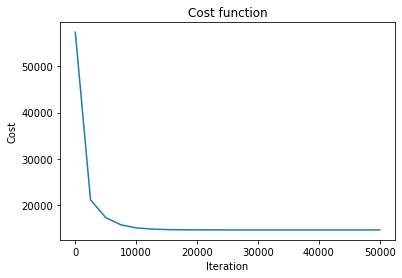

In [29]:
# Code below presents execution of algorithm
# You can experiment with values of 2 variables below.
learning_rate = 0.0007
epochs = 50000

display_every = int(epochs / 20)

th0 = 0 #The initial th0 value
th1 = 0 #The initial th1 value

cost_list = []
iter_list = []

for i in range(epochs):
    #Learning process. With your functions the entire learning code is only 2 lines
    del0, del1 = compute_derivatives(x, y, th0, th1)
    th0, th1 = update_theta(th0, th1, del0, del1, learning_rate)

    #This code is used only for displaying results. You do not need to understand it
    if ((i%display_every) == 0) | (i == epochs-1):
        curr_cost = cost(y, compute_h(x, th0, th1))
        cost_list.append(curr_cost)
        iter_list.append(i)
        print('Iteration {}, Theta 0: {:.2f}, Theta 1: {:.2f}, Cost: {:.2f}'
              .format(i, th0, th1, curr_cost))


#This code is used only for displaying results. You do not need to understand it
f = plt.figure()
plt.plot(iter_list, cost_list)
plt.title("Cost function")
plt.xlabel('Iteration')
plt.ylabel('Cost');

Cell below presents plot of algorithm result and prints best parameters th0 and th1 which minimize cost function




Your results:
h(x) = 352.35 + x*-17.50
Cost = 14725.14


Text(0.5, 1.0, 'y = 352.35423319923046 + -17.498320333676144 * x')

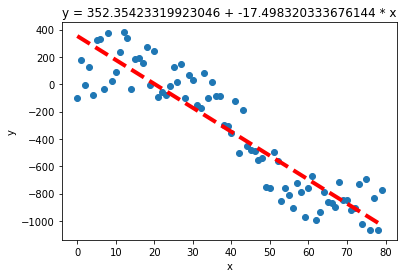

In [33]:
print('\nYour results:')
print ('h(x) = {:.2f} + x*{:.2f}'.format(th0, th1))
print('Cost = {:.2f}'.format(cost(y, compute_h(x, th0, th1))))

fig = plt.figure()
plt.scatter(x, y)
y_min = th0 + th1 * x.min()
y_max = th0 + th1 * x.max()
plt.plot([x.min(), x.max()], [y_min, y_max], 'k--', lw=4, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = {} + {} * x'.format(th0, th1))